<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/CryptoPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:

Download the Bitcoin closing price data from Yahoo Finance.
Perform data cleaning, handling missing values, and normalization.
Create sequences of data for training the LSTM model.
Model Implementation (LSTM):

-

Build an LSTM model architecture.

Train the LSTM model using the preprocessed data.

Model Evaluation:

-

Evaluate the performance of the trained LSTM model using appropriate metrics.

Repeat for Two Other Algorithms:

-

Choose and implement two additional algorithms for comparison.

Final Model Recommendation:

-

Compare the performance of the three models.

Recommend the best-performing model.


Let's start with the data preprocessing step:

-

Data Preprocessing:

Import Libraries:


Import necessary libraries such as Pandas, NumPy, Matplotlib, Yahoo Finance (to fetch data), and TensorFlow/Keras (for modeling).
Fetch Data:

Use the yfinance library to fetch historical Bitcoin closing price data from Yahoo Finance.
Data Cleaning:

Handle any missing values in the data.
Data Normalization:

Normalize the data to scale it within a specific range (e.g., using Min-Max scaling).
Create Sequences:

Convert the normalized data into sequences suitable for LSTM training.

In [1]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import yfinance as yf

# Importing the dataset

1. import the dataset into df

2. save it to csv

3. read it from csv

The above process is done to read Date as a column which is not possible by simply importing the dataset.

In [2]:
df = yf.download('BTC',
                      period='max',
                      progress=True,
)
print(df.tail())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-08-03  90.841003  90.841003  90.629997  90.806297  90.806297   19669
2023-08-04  91.059998  91.325302  91.059998  91.325302  91.325302    1528
2023-08-07  91.264999  91.290001  91.255501  91.255501  91.255501    2623
2023-08-08  91.448997  91.448997  91.427696  91.427696  91.427696     240
2023-08-09  91.401001  91.415100  91.401001  91.415100  91.415100     612


# Checking for null values

In [30]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No null values present, if it did, we could simply drop it as there is abundance of information

In [3]:
df.to_csv('BTC.csv')

In [4]:
df = pd.read_csv('BTC.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,2020-10-02,100.000000,100.000000,100.000000,100.000000,100.000000,0
2,2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725
3,2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080
4,2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350


In [27]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
712,2023-08-02,91.052902,91.052902,91.052902,91.052902,91.052902,48
713,2023-08-03,90.841003,90.841003,90.629997,90.806297,90.806297,19669
714,2023-08-04,91.059998,91.325302,91.059998,91.325302,91.325302,1528
715,2023-08-07,91.264999,91.290001,91.255501,91.255501,91.255501,2623
716,2023-08-08,91.448997,91.448997,91.427696,91.427696,91.427696,240


As you can see, previously from 6 columns we now have 7 columns successfully

In [28]:
df.shape

(717, 7)

# EDA

2022 Analysis

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2022 = df.loc[(df['Date'] >= '2022-01-01')
                     & (df['Date'] < '2023-01-01')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
316,2022-01-03,98.309998,98.309998,98.294701,98.294701
317,2022-01-04,98.279999,98.291496,98.279999,98.291496
318,2022-01-05,98.250000,98.269997,98.090103,98.096397
319,2022-01-06,97.985001,97.985001,97.985001,97.985001
320,2022-01-07,97.894600,97.894600,97.894600,97.894600
...,...,...,...,...,...
562,2022-12-23,90.771004,90.804497,90.760002,90.804497
563,2022-12-27,90.509598,90.509598,90.509598,90.509598
564,2022-12-28,90.420998,90.434700,90.420998,90.434700
565,2022-12-29,90.592300,90.592300,90.592300,90.592300


In [32]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,97.760109,97.744695
February,96.736448,96.735911
March,95.725283,95.717987
April,93.746540,93.741555
May,93.376647,93.397838
June,92.589743,92.557096
July,93.328220,93.334686
August,93.469917,93.463535
September,91.310271,91.299347


In [33]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [34]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [35]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall analysis

In [7]:
df = pd.read_csv('BTC.csv')

# dropping the unecessary columns
df = df.drop(columns= ['Volume', 'Adj Close'], axis=1)
print(df)

           Date        Open        High         Low       Close
0    2020-10-01  100.000000  100.000000  100.000000  100.000000
1    2020-10-02  100.000000  100.000000  100.000000  100.000000
2    2020-10-05  100.029999  100.040001   99.995003   99.995003
3    2020-10-06  100.010002  100.029999  100.010002  100.029999
4    2020-10-07   99.949997   99.959999   99.919998   99.919998
..          ...         ...         ...         ...         ...
713  2023-08-03   90.841003   90.841003   90.629997   90.806297
714  2023-08-04   91.059998   91.325302   91.059998   91.325302
715  2023-08-07   91.264999   91.290001   91.255501   91.255501
716  2023-08-08   91.448997   91.448997   91.427696   91.427696
717  2023-08-09   91.401001   91.415100   91.401001   91.415100

[718 rows x 5 columns]


In [51]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,97.760109,97.744695
February,96.736448,96.735911
March,95.725283,95.717987
April,93.746540,93.741555
May,93.376647,93.397838
June,92.589743,92.557096
July,93.328220,93.334686
August,93.469917,93.463535
September,91.310271,91.299347


In [52]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [54]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Dropping unecessary columns

In [55]:
df.head()

,Date,Open,High,Low,Close
0,2020-10-01,100.000000,100.000000,100.000000,100.000000
1,2020-10-02,100.000000,100.000000,100.000000,100.000000
2,2020-10-05,100.029999,100.040001,99.995003,99.995003
3,2020-10-06,100.010002,100.029999,100.010002,100.029999
4,2020-10-07,99.949997,99.959999,99.919998,99.919998


In [63]:
df = df[['Date', 'Close']]

In [64]:
print(df.head())
print(df.tail())

         Date       Close
0  2020-10-01  100.000000
1  2020-10-02  100.000000
2  2020-10-05   99.995003
3  2020-10-06  100.029999
4  2020-10-07   99.919998
           Date      Close
712  2023-08-02  91.052902
713  2023-08-03  90.806297
714  2023-08-04  91.325302
715  2023-08-07  91.255501
716  2023-08-08  91.427696


In [58]:
df.shape

(717, 2)

In [60]:
fig = px.line(df, x=df.Date, y=df.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2020-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Taking only 1 year of data owing to the fluctuations, that we confuse the model

In [8]:
'''
df = df[df['Date'] > '2022-08-09']
close_stock = df.copy()
print("Total data for prediction: ",df.shape[0])
'''

Total data for prediction:  251


In [9]:
df = pd.read_csv('BTC-USD.csv')

# dropping the unecessary columns
df = df[['Close']]
print(df)

            Close
0    23947.642578
1    23957.529297
2    24402.818359
3    24424.068359
4    24319.333984
..            ...
360  29042.126953
361  29041.855469
362  29180.578125
363  29765.492188
364  29480.964844

[365 rows x 1 columns]


Normalizing the Data

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(365, 1)


Train Test Split

In [12]:
training_size = int(len(df)*0.60)
test_size = len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (219, 1)
test_data:  (146, 1)


# Creating time series data

The function below is very important in LSTM model training.

Here we have to create a time series analysis sequence of data

Input:

time_step=3, dataset=[1,2,3,4,5,6,7,8,9,10]

Output:

dataX: [[1,2,3],[2,3,4],[3,4,5]...[7,8,9]]

dataY: [4,5,6...10]

As you can see above in dataX closing price for 3 days is taken and it's corresponding dataY value is the prediction value, i.e., value of the next day, i.e., 4th day.

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (203, 15)
y_train:  (203,)
X_test:  (130, 15)
y_test (130,)


In the below code, we take the X-train, X_test as it is, we just add one more dimension which is the necessary input shape of the LSTm model

The 1 extra dimension defines the no of features in the dataset (I think in this case we take it as 1 because we consider only the closing price.)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (203, 15, 1)
X_test:  (130, 15, 1)


# Building the Model

In [51]:
regressor=Sequential()

regressor.add(LSTM(10,input_shape=(None,1),activation="relu"))

regressor.add(Dense(1))

regressor.compile(loss="mean_squared_error",optimizer="adamax")
history = regressor.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 62ms/step - loss: 0.1439 - val_loss: 0.9972
Epoch 2/200
7/7 [==============================] - 0s 16ms/step - loss: 0.1208 - val_loss: 0.8975
Epoch 3/200
7/7 [==============================] - 0s 18ms/step - loss: 0.1034 - val_loss: 0.8140
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 0.0901 - val_loss: 0.7463
Epoch 5/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0792 - val_loss: 0.6911
Epoch 6/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0704 - val_loss: 0.6441
Epoch 7/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0622 - val_loss: 0.5995
Epoch 8/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0545 - val_loss: 0.5536
Epoch 9/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0478 - val_loss: 0.5101
Epoch 10/200
7/7 [==============================] - 0s 19ms/step - loss: 0.0420 - val_loss: 0.4685
Epoch 11/200
7/7 [=

In [49]:
#regressor.compile(loss="mean_squared_error",optimizer="adamax")

In [50]:
#history = regressor.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

# Plotting training and validation loss graphs

<Figure size 640x480 with 0 Axes>

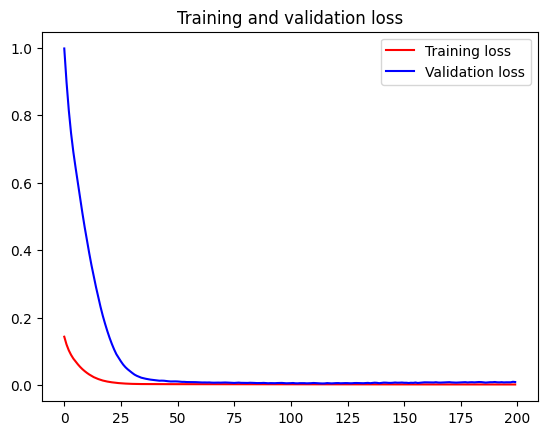

<Figure size 640x480 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

Predicting from the trained model

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 5ms/step


((203, 1), (130, 1))

Model Evaluation

In [54]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [55]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  782.5749642227598
Train data MSE:  612423.5746282538
Train data MAE:  499.53975525492615
-------------------------------------------------------------------------------------
Test data RMSE:  1549.9958601252456
Test data MSE:  2402487.1664054
Test data MAE:  1365.4835938009614


Variance regression score

In [56]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9010895677749977
Test data explained variance regression score: 0.7354187009541288


R square score for regression

In [57]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.901073836751646
Test data R2 score: -0.025720869475355235


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)


In [58]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0014838221296965542
Test data MGD:  0.003135216831837542
----------------------------------------------------------------------
Train data MPD:  30.004497730480374
Test data MPD:  86.68948140599365


In [59]:
close_stock = pd.read_csv('BTC-USD.csv')
close_stock = close_stock[['Date', 'Close']]

In [60]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


Predicting the next 30 days

In [61]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = regressor.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [62]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [63]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(df[len(df)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting entire Closing Stock Price with next 30 days period of prediction


In [64]:
lstmdf=df.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()